In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from datetime import date
import numpy as np

# import competition_manager as cm
from competition_manager import *

## Prepare real players data

In [227]:
team_members = ["Andrey Spiridonov", "Andrey Trubicin", "Andrey Larionov", "Veselin", "Fedor", "Andrey Selifonov",
                "Dmitro Ilchenko", "Sergii Kolbasin", "Vlad", "Pavel Karacharov", "Sanya", "Roman", "Ivan", "Denys", "Vitalii Zhebrakovksy",
                "Oleksandr", "Loginov Dmitrii", "Artem Bykov", "Kirill", "Bondarev Yurii", "Gundars Mednis", "Alexandr Mikhailov",
                "Pedro Ispanec", "Dimon Sirnik Lozuk", "Sergey Konovalov", "Vladimir Chavskiy", "Alex Akimov", "Andrey", "Sanya DrugIlchenko", 
                "Vitalik goalkeeper", "Dimon Melkii"]


In [228]:
team_members_with_ids = {idx + 1: tm for idx, tm in enumerate(team_members)}
team_members_with_ids

{1: 'Andrey Spiridonov',
 2: 'Andrey Trubicin',
 3: 'Andrey Larionov',
 4: 'Veselin',
 5: 'Fedor',
 6: 'Andrey Selifonov',
 7: 'Dmitro Ilchenko',
 8: 'Sergii Kolbasin',
 9: 'Vlad',
 10: 'Pavel Karacharov',
 11: 'Sanya',
 12: 'Roman',
 13: 'Ivan',
 14: 'Denys',
 15: 'Vitalii Zhebrakovksy',
 16: 'Oleksandr',
 17: 'Loginov Dmitrii',
 18: 'Artem Bykov',
 19: 'Kirill',
 20: 'Bondarev Yurii',
 21: 'Gundars Mednis',
 22: 'Alexandr Mikhailov',
 23: 'Pedro Ispanec',
 24: 'Dimon Sirnik Lozuk',
 25: 'Sergey Konovalov',
 26: 'Vladimir Chavskiy',
 27: 'Alex Akimov',
 28: 'Andrey',
 29: 'Sanya DrugIlchenko',
 30: 'Vitalik goalkeeper',
 31: 'Dimon Melkii'}

In [229]:
len(team_members_with_ids)

31

{1: 'Andrey Spiridonov', #9.75
 2: 'Andrey Trubicin', # 9 
 3: 'Andrey Larionov', #5
 4: 'Veselin', # 6
 5: 'Fedor', # 7
 6: 'Andrey Selifonov', # 6.5
 7: 'Dmitro Ilchenko', #7.5
 8: 'Sergii Kolbasin', # 6.5
 9: 'Vlad', #4
 10: 'Pavel Karacharov', # 7
 11: 'Sanya', # 6
 12: 'Roman', # 6.5
 13: 'Ivan', # 9.25
 14: 'Denys', # 4.5
 15: 'Vitalii Zhebrakovksy', #6.75
 16: 'Oleksandr', #9.25
 17: 'Loginov Dmitrii', # 8.5
 18: 'Artem Bykov', # 7.5
 19: 'Kirill', #9.5
 20: 'Bondarev Yurii', # 5
 21: 'Gundars Mednis', # 5.5
 22: 'Alexandr Mikhailov', # 5.5
 23: 'Pedro Ispanec', #9.5
 24: 'Dimon Sirnik Lozuk', # 8.75
 25: 'Sergey Konovalov' # 6.5,
 26: 'Vladimir Chavskiy' # 8,
 27: 'Alex Akimov' # 7,
 28: 'Andrey' # 7.5,
 29: 'Sanya DrugIlchenko', #8
 30: 'Vitalik goalkeeper', #7,
 31: 'Dimon Melkii' # 6.5}

In [230]:
player_strengths_estimates = np.array([0, 9.5, 9, 5, 6, 8.5, 6.5, 7.5, 6.5,4, 7, 6,6.5, 9.25, 4.5, 6.75, 9.25, 8.5, 
                                       7.5, 9.5, 5, 5.5, 5.5 , 9.5, 8.75, 6.5, 8, 7, 7.5, 8 , 7, 6.5])

In [231]:
len(player_strengths_estimates)

32

In [232]:

def name_to_var(name):
    """Convert a full name string into a valid Python variable name."""
    # Lowercase, replace spaces with underscores, remove non-alphanumeric/underscore characters
    import re
    var = name.lower()
    var = var.replace(' ', '_')
    var = re.sub(r'[^0-9a-z_]', '', var)
    return var

# Define variables dynamically in globals()
for idx, name in team_members_with_ids.items():
    var_name = name_to_var(name)
    globals()[var_name] = idx

## Historical data / competitions

In [233]:
historical_cometitions = [
    Competition([loginov_dmitrii, andrey_spiridonov, veselin, alexandr_mikhailov, ivan],
     [kirill, andrey_trubicin, oleksandr, fedor, denys], 11, date(2025, 7, 13 ),
               {
                   fedor:6, andrey_trubicin:6, oleksandr:4, kirill:2, 
                   loginov_dmitrii:7, veselin:4, ivan:12, andrey_spiridonov:5
               }),

    Competition([roman, oleksandr, andrey_trubicin, denys, andrey_selifonov, veselin],
     [alex_akimov, loginov_dmitrii, andrey_larionov, vitalik_goalkeeper, artem_bykov, andrey_spiridonov], 1, date(2025, 7, 6 )),

    Competition([andrey_selifonov, roman, loginov_dmitrii, andrey_trubicin, kirill, vitalik_goalkeeper],
     [oleksandr, andrey_larionov, sergii_kolbasin, andrey_spiridonov, pavel_karacharov, vlad], 2, date(2025, 6, 22 ),
               {
                    andrey_trubicin: 8, andrey_selifonov: 2, kirill: 3, roman: 3, loginov_dmitrii: 4,
                    andrey_larionov: 1, andrey_spiridonov: 2, pavel_karacharov: 5, vlad: 4, sergii_kolbasin: 3, oleksandr: 2 
               }),

    Competition([ivan, artem_bykov, andrey_larionov, oleksandr, gundars_mednis, veselin, vitalii_zhebrakovksy, andrey_spiridonov],
     [andrey_trubicin, loginov_dmitrii, dimon_sirnik_lozuk, kirill, alex_akimov, dimon_melkii, roman, sergii_kolbasin], 3, date(2025, 6, 14 )),

    Competition([andrey_trubicin, loginov_dmitrii, roman, sergii_kolbasin, gundars_mednis],
     [andrey_spiridonov, oleksandr, vlad, alex_akimov, vitalii_zhebrakovksy], 3, date(2025, 6, 9 )),

    Competition([ivan, bondarev_yurii, loginov_dmitrii, andrey_larionov, fedor, andrey_spiridonov, roman, dimon_sirnik_lozuk],
     [oleksandr, dimon_melkii, andrey_selifonov, artem_bykov, andrey_trubicin, gundars_mednis, pedro_ispanec, veselin], 3, date(2025, 6, 8 ), 
               {
                   fedor: 6, andrey_larionov: 1, loginov_dmitrii: 2, bondarev_yurii: 1, andrey_spiridonov: 1, ivan: 1, dimon_sirnik_lozuk:1,
                   andrey_selifonov: 1, andrey_trubicin: 4, pedro_ispanec: 1, artem_bykov: 1, dimon_melkii: 1 
               }),

    Competition([andrey_larionov, vitalii_zhebrakovksy, roman, andrey_spiridonov, loginov_dmitrii, sergii_kolbasin],
     [oleksandr, veselin, andrey_selifonov, bondarev_yurii, alex_akimov, andrey_trubicin], 1, date(2025, 5, 25 ), 
               {
                   sergii_kolbasin: 2, roman: 2, loginov_dmitrii: 6, andrey_spiridonov: 4, andrey_larionov: 1,
                   oleksandr: 3, andrey_selifonov: 2, veselin: 4, andrey_trubicin: 4
               }),

    Competition([oleksandr, fedor, andrey_spiridonov, loginov_dmitrii, vitalii_zhebrakovksy, pavel_karacharov],
     [pedro_ispanec, andrey, andrey_trubicin, artem_bykov, roman, kirill], 1, date(2025, 5, 4 ),
               {
                   oleksandr: 4, loginov_dmitrii: 4, pavel_karacharov: 2, fedor: 1, andrey_spiridonov: 2, vitalii_zhebrakovksy: 1,
                    andrey_trubicin: 4, roman: 1, pedro_ispanec: 4, artem_bykov: 4
               }), # 14:13

    Competition([loginov_dmitrii, alex_akimov, andrey_larionov, oleksandr, veselin, andrey, andrey_trubicin],
     [bondarev_yurii, artem_bykov, ivan, gundars_mednis, andrey_selifonov, roman, andrey_spiridonov], -2, date(2025, 4, 12 ),
               {
                   andrey_trubicin: 7, andrey_larionov: 1, oleksandr: 1, 
                   andrey_selifonov: 3, andrey_spiridonov: 3, bondarev_yurii: 3, ivan: 1, artem_bykov: 1
               }), # 9:11

    Competition([andrey_larionov, gundars_mednis, andrey_spiridonov, loginov_dmitrii, andrey_selifonov],
     [oleksandr, vitalii_zhebrakovksy, andrey_trubicin, roman, denys], -3, date(2025, 4, 6 ),
               {
                   loginov_dmitrii: 4, andrey_spiridonov: 4, gundars_mednis: 2, andrey_selifonov: 2, andrey_larionov: 1,
                    oleksandr: 4, andrey_trubicin: 6, vitalii_zhebrakovksy: 3, denys: 1, roman: 2
               }), # 13:16

    
    
    Competition([andrey_trubicin, fedor, gundars_mednis, pedro_ispanec, loginov_dmitrii],
     [ivan, roman, alexandr_mikhailov, andrey_spiridonov, andrey_selifonov], -4, date(2025, 3, 29 )),

    Competition([loginov_dmitrii, dimon_sirnik_lozuk, roman, sanya, andrey_larionov, sergii_kolbasin, roman, denys],
     [veselin, andrey_spiridonov, andrey_trubicin, fedor, pedro_ispanec, artem_bykov, andrey, vlad], -4, date( 2025, 3, 22)),

    Competition([roman, andrey_spiridonov, andrey_trubicin, ivan, pedro_ispanec, denys, artem_bykov],
     [bondarev_yurii, fedor, kirill, oleksandr, andrey_larionov, veselin, loginov_dmitrii], 0, date(2025, 3, 9)),

    Competition([andrey_larionov, oleksandr, andrey_trubicin, veselin, loginov_dmitrii, kirill, roman, pedro_ispanec, pavel_karacharov],
     [ivan, dmitro_ilchenko, andrey_spiridonov, fedor, artem_bykov, sanya, sanya_drugilchenko, andrey_selifonov, alexandr_mikhailov], -1, date(2025, 3, 2)),

    Competition([oleksandr, vlad, andrey_spiridonov, artem_bykov, andrey_larionov, andrey_trubicin, roman, bondarev_yurii],
     [ivan, fedor, loginov_dmitrii, denys, dmitro_ilchenko, andrey_selifonov, sergii_kolbasin, pedro_ispanec], 1, date(2025, 2, 8)),

    Competition([roman, andrey_trubicin, ivan, andrey_spiridonov, veselin, vlad, sergii_kolbasin, andrey_selifonov],
     [denys, oleksandr, dmitro_ilchenko, fedor, artem_bykov, andrey_larionov, loginov_dmitrii, sanya], 0, date(2025, 2, 1)),

    Competition([loginov_dmitrii, alexandr_mikhailov, bondarev_yurii, pavel_karacharov, fedor, dmitro_ilchenko],
     [oleksandr, andrey_trubicin, andrey, andrey_larionov, artem_bykov, vitalii_zhebrakovksy], 0, date(2025, 1, 26)),

    
    Competition([bondarev_yurii, dmitro_ilchenko, roman, andrey_trubicin, andrey_spiridonov, vlad, pavel_karacharov, artem_bykov],
     [loginov_dmitrii, veselin, ivan, oleksandr, vitalii_zhebrakovksy, sergii_kolbasin, denys, andrey_larionov], 0, date(2025, 1, 18)),  # Black legs matter

    Competition([vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin],
     [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov], 0, date(2024, 12, 29)),
]

In [234]:
len(historical_cometitions)

19

In [235]:
np.random.seed(42)  # for reproducibility

NUM_PLAYERS = len(team_members_with_ids)
MIN_TEAM_SIZE = 5
MAX_TEAM_SIZE = 9
NUM_GAMES = len(historical_cometitions)

teamA_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
teamB_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
outcomes = np.zeros(NUM_GAMES)

print(f"Shape of teamA_data: {teamA_data.shape}")

for comp_i, competition in enumerate(historical_cometitions):

    teamA_players = competition.team_a
    teamB_players = competition.team_b
    assert len(teamA_players) == len(teamB_players), f"Teams are supposed to be of equal size, Team A:{len(teamA_players)} Team B: {len(teamB_players)}"
    team_size = len(teamA_players)

    outcomes[comp_i] = competition.score_diff

    # print(teamA_players)
    # print(teamB_players)
    # Pad teams to max size using zeros (which corresponds to masked player)
    teamA_data[comp_i, :team_size] = teamA_players
    teamB_data[comp_i, :team_size] = teamB_players

print("teamA_data shape:", teamA_data.shape)
print("teamB_data shape:", teamB_data.shape)
print("outcomes shape:", outcomes.shape)

Shape of teamA_data: (19, 9)
teamA_data shape: (19, 9)
teamB_data shape: (19, 9)
outcomes shape: (19,)


## Version of the model for real data

In [236]:
teamB_data.shape

(19, 9)

## Masked MSE function

In [237]:
def masked_mse(missing_value=-1.0):
    def loss(y_true, y_pred):
        mask = tf.not_equal(y_true, missing_value)
        y_true_masked = tf.boolean_mask(y_true, mask)
        y_pred_masked = tf.boolean_mask(y_pred, mask)
        loss_value = tf.reduce_mean(tf.square(y_true_masked - y_pred_masked))
        # print(f"Loss value {y_true.numpy()}: {loss_value}") tensors are only symbolic at this stage. Only with eager execution can work
        # tf.print("goals_out y_true:", y_true, summarize=10)
        # tf.print("goals_out mask:", mask, summarize=10)
        # tf.print("goals_out y_true_masked:", y_true_masked, summarize=100)
        # tf.print("goals_out y_pred_masked:", y_pred_masked, summarize=100)
        
        return loss_value
    return loss

## Checking embedding of the player-zero

In [308]:
player_embedding_layer = model.get_layer("player_embedding")
embeddings_before = player_embedding_layer.get_weights()[0].copy()
print("Embedding vector for player zero before training:", embeddings_before[0])

Embedding vector for player zero before training: [ 0.02064757  0.02028855  0.01195078  0.04322245 -0.04465061  0.02237313
 -0.02295465 -0.00910922  0.03501461 -0.01450778 -0.02912787  0.03352888
  0.01387408 -0.01632659  0.01128251 -0.00796448  0.02089128 -0.03402126
  0.00058982 -0.00028681 -0.02384352  0.03908164 -0.02177261 -0.03390864
  0.02820792  0.02658874 -0.00016009  0.00520243 -0.0271118   0.00478804
  0.01558689  0.01949925]


## Building a model / model definition

In [294]:

def build_model(num_players, player_emb_dim, max_team_size):

    #TODO max_team_size is not used??
    
    # Inputs: variable-length teams
    teamA_input = Input(shape=(None,), dtype='int32', name='teamA')  # variable-length
    teamB_input = Input(shape=(None,), dtype='int32', name='teamB')  # variable-length
    
    # Embedding layer with mask support
    player_embedding = layers.Embedding(
        input_dim=num_players + 1,  # includes 0 for mask
        output_dim=player_emb_dim,
        mask_zero=True,  # Important: enables automatic masking for padding (0 as pad token)
        embeddings_regularizer=tf.keras.regularizers.l2(1e-4),
        name='player_embedding'
    )
    
    # Embed team players
    teamA_embeds = player_embedding(teamA_input)  # shape: (batch, teamA_len, emb_dim)
    teamB_embeds = player_embedding(teamB_input)
    
    # Self-attention block (respects masks automatically if using Functional API)
    def self_attention_block(x, name_prefix=''):
        attn_output = layers.MultiHeadAttention(
            num_heads=4,
            key_dim=player_emb_dim,
            dropout=0.1,
            name=f'{name_prefix}_attn'
        )(x, x)
        x = layers.Add(name=f'{name_prefix}_residual')([x, attn_output])
        x = layers.LayerNormalization(name=f'{name_prefix}_norm')(x)
        return x
    
    # Apply attention
    teamA_attn = self_attention_block(teamA_embeds, 'teamA')
    teamB_attn = self_attention_block(teamB_embeds, 'teamB')
    
    # Global average pooling over valid (non-padded) tokens
    # TF handles masking automatically in GlobalAveragePooling1D if mask_zero=True
    teamA_vector = layers.GlobalAveragePooling1D(name='teamA_avgpool')(teamA_attn)
    teamB_vector = layers.GlobalAveragePooling1D(name='teamB_avgpool')(teamB_attn)
    
    # Matchup modeling (difference vector)
    matchup_vector = layers.Subtract(name='matchup_diff')([teamA_vector, teamB_vector])
    
    # Concatenate summary representation
    match_input = layers.Concatenate(name='match_features')([teamA_vector, teamB_vector, matchup_vector])
    
    # Feedforward classification head
    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(match_input)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = layers.Dropout(0.3)(x)
    
    outcome = layers.Dense(1, activation='linear', name='game_outcome')(x)
    
    # Output 2: Player goals (per player in both teams, flatten and predict goals per player)
    all_team_players = layers.Concatenate(axis=1)([teamA_input, teamB_input])  # shape (batch, 2*max_team_size)
    emb_all = player_embedding(all_team_players)  # shape (batch, 2*max_team_size, emb_dim)
    goals_dense = layers.TimeDistributed(layers.Dense(1))(emb_all)
    goals_out = layers.Flatten(name="player_goals")(goals_dense)  # shape (batch, 2*max_team_size)
    # goals_out = layers.Lambda(lambda x: tf.reshape(x, (tf.shape(x)[0], -1)), name="player_goals")(goals_dense)
    
    # Final model
    model = Model(inputs=[teamA_input, teamB_input], outputs=[outcome, goals_out])
    model.compile(optimizer='adam', 
                  # loss='mean_squared_error',   # or 'mean_absolute_error'
                  #   metrics=['mean_absolute_error']
                  loss={"game_outcome": "mean_squared_error", "player_goals": masked_mse(missing_value=-1.0)},
                  loss_weights={
                        "game_outcome": 1.0,     # full weight
                        "player_goals": 0.2      # reduce influence of goals output loss by factor of 10
                    },
                   metrics={"game_outcome": "mean_absolute_error"}
                 )
    
    # model.summary()
    return model

In [295]:
def competitions_goals_to_player_goals(competitions, num_games, max_team_size):
    base = np.full((num_games, 2 * max_team_size), -1)
    # print(base.shape)
    def pad_team(players):
        padded = players + [0]*(max_team_size - len(players))
        return padded
    
    for comp_i, competition in enumerate(historical_cometitions):
        # print(comp_i)
        # print(competition)
        # players should be in the same order as when we are building team's embeddings
        all_players = pad_team(competition.team_a) + pad_team(competition.team_b)
        for key, val in competition.scores_stats.items():
            idx_for_player = all_players.index(key)
            base[comp_i, idx_for_player] = val
    return base
    
    

In [296]:
player_goals = competitions_goals_to_player_goals(historical_cometitions, NUM_GAMES, MAX_TEAM_SIZE) #np.random.rand(NUM_GAMES, 2 * MAX_TEAM_SIZE)
player_goals

array([[ 7,  5,  4, -1, 12, -1, -1, -1, -1,  2,  6,  4,  6, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 2,  3,  4,  8,  3, -1, -1, -1, -1,  2,  1,  3,  2,  5,  4, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 1,  1,  2,  1,  6,  1, -1,  1, -1, -1,  1,  1,  1,  4, -1,  1,
        -1, -1],
       [ 1, -1,  2,  4,  6,  2, -1, -1, -1,  3,  4,  2, -1, -1,  4, -1,
        -1, -1],
       [ 4,  1,  2,  4,  1,  2, -1, -1, -1,  4, -1,  4,  4,  1, -1, -1,
        -1, -1],
       [-1, -1,  1,  1, -1, -1,  7, -1, -1,  3,  1,  1, -1,  3, -1,  3,
        -1, -1],
       [ 1,  2,  4,  4,  2, -1, -1, -1, -1,  4,  3,  6,  2,  1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -

In [297]:
has_goals = (~np.all(player_goals == -1, axis=1)).astype(float)
has_goals

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [298]:
max_goals = np.max(player_goals[player_goals != -1])  # exclude missing values marked as -1
print(f"Max goals in dataset: {max_goals}")

Max goals in dataset: 12


In [299]:
# Create a copy to avoid modifying original data
scaled_player_goals = np.copy(player_goals).astype(float) # otherwise values will be rounded to 0

# Scale non-missing elements
mask = (player_goals != -1)
scaled_player_goals[mask] = player_goals[mask] / max_goals

# Leave missing values as is (-1)

In [300]:
scaled_player_goals

array([[ 0.58333333,  0.41666667,  0.33333333, -1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        ,  0.16666667,
         0.5       ,  0.33333333,  0.5       , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [ 0.16666667,  0.25      ,  0.33333333,  0.66666667,  0.25      ,
        -1.        , -1.        , -1.        , -1.        ,  0.16666667,
         0.08333333,  0.25      ,  0.16666667,  0.41666667,  0.33333333,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.   

## Run training over K folds

/opt/anaconda3/envs/footballman/lib/python3.12/site-packages/keras/src/layers/layer.py:939: UserWarning:

Layer 'player_goals' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.



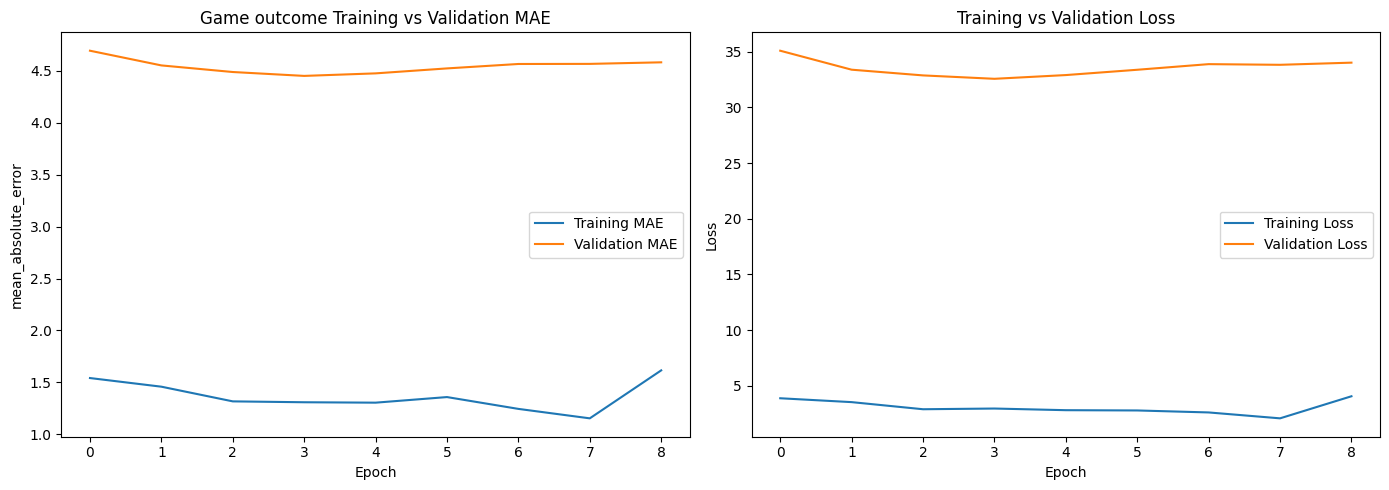

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - game_outcome_loss: 32.5364 - game_outcome_mean_absolute_error: 4.4519 - loss: 32.5740 - player_goals_loss: 0.1275
Fold val total_loss: 32.5740 | Fold val game_outcome_loss: 32.5364 | val player_goals_loss: 0.1275 | metric: 4.4519


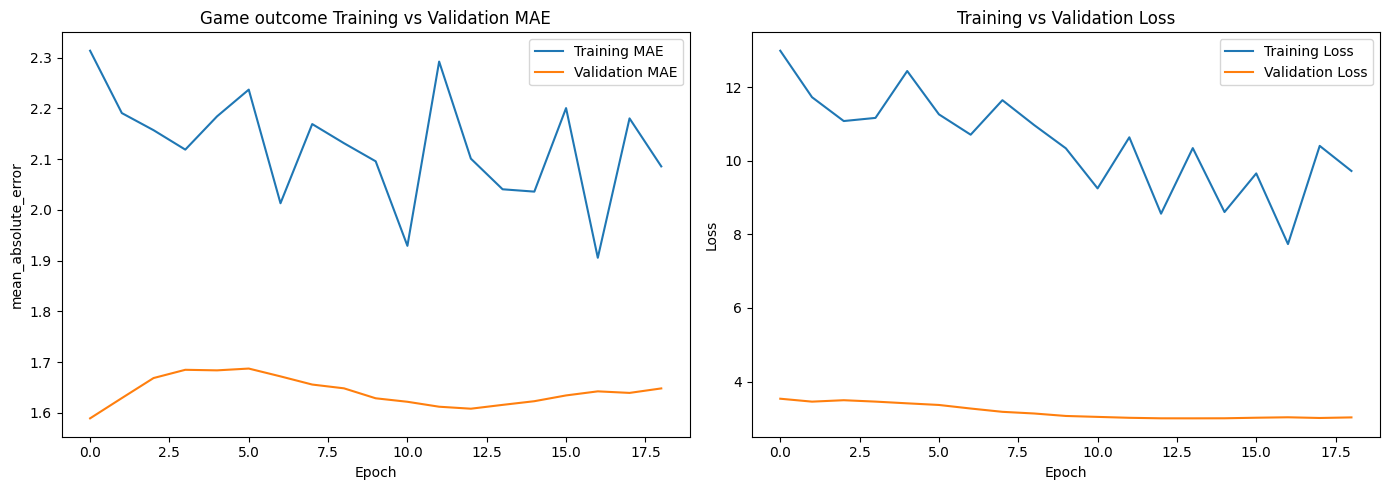

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - game_outcome_loss: 2.9808 - game_outcome_mean_absolute_error: 1.6159 - loss: 3.0026 - player_goals_loss: 0.0497
Fold val total_loss: 3.0026 | Fold val game_outcome_loss: 2.9808 | val player_goals_loss: 0.0497 | metric: 1.6159


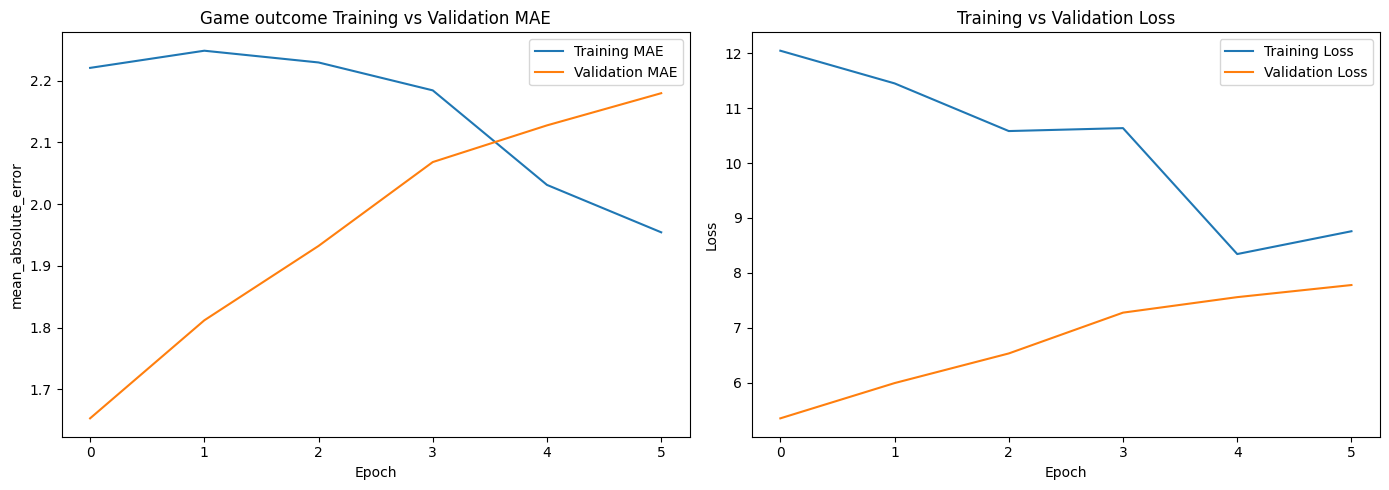

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - game_outcome_loss: 5.3196 - game_outcome_mean_absolute_error: 1.6529 - loss: 5.3482 - player_goals_loss: 0.0825
Fold val total_loss: 5.3482 | Fold val game_outcome_loss: 5.3196 | val player_goals_loss: 0.0825 | metric: 1.6529


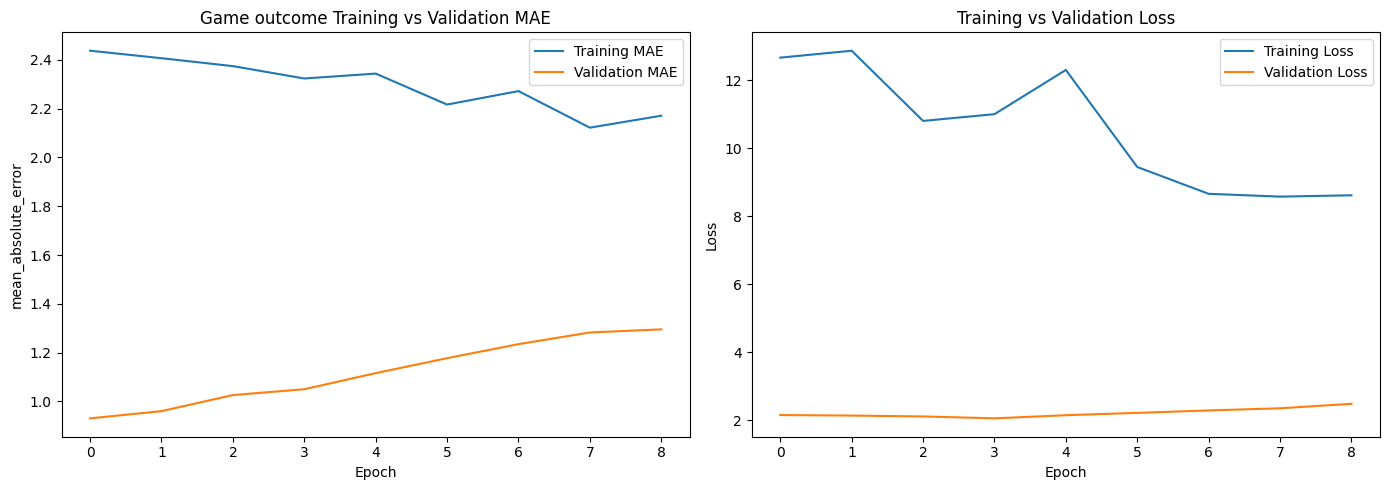

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - game_outcome_loss: 2.0290 - game_outcome_mean_absolute_error: 1.0495 - loss: 2.0540 - player_goals_loss: 0.0651
Fold val total_loss: 2.0540 | Fold val game_outcome_loss: 2.0290 | val player_goals_loss: 0.0651 | metric: 1.0495


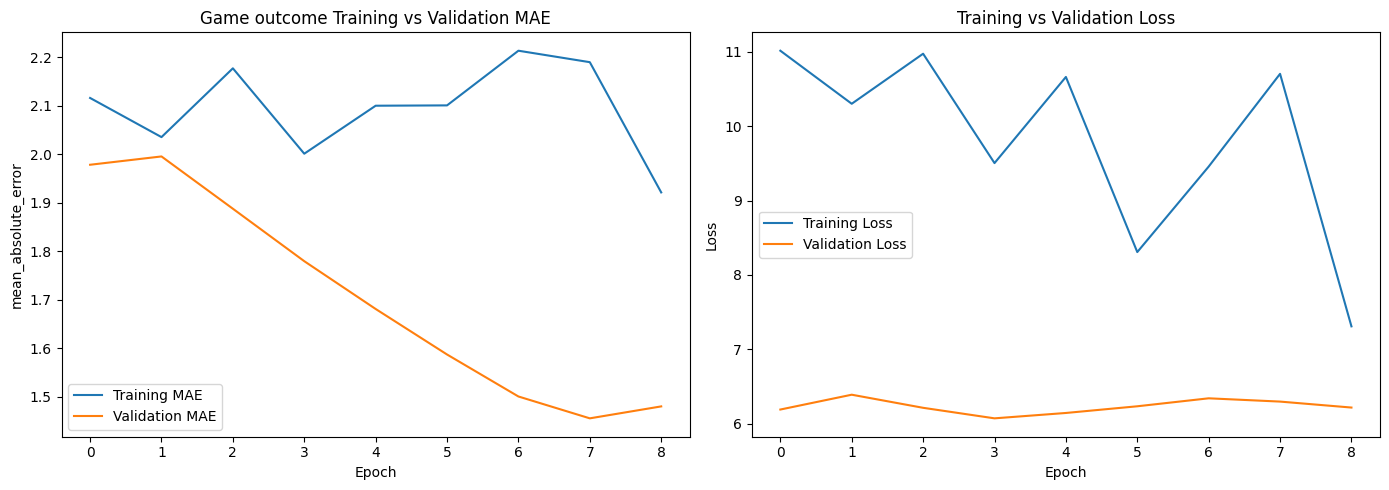

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - game_outcome_loss: 6.0423 - game_outcome_mean_absolute_error: 1.7795 - loss: 6.0711 - player_goals_loss: 0.0840
Fold val total_loss: 6.0711 | Fold val game_outcome_loss: 6.0423 | val player_goals_loss: 0.0840 | metric: 1.7795
Mean cross-validated accuracy: 9.8100


In [301]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


X = [teamA_data, teamB_data]
y = [outcomes, scaled_player_goals]


# 3. Optional: callbacks for monitoring
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define a learning rate schedule function (step decay example)
def lr_schedule(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10
    if epoch > 0 and epoch % epochs_drop == 0:
        return lr * drop_rate
    return lr

#Instantiate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Or adaptive reduction on plateau (reduce LR when val_loss stalls)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=5, min_lr=1e-6)

NUM_PLAYERS = len(team_members_with_ids)
PLAYER_EMB_DIM = 32

# K-fold CV setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = []
for train_ix, val_ix in kf.split(teamA_data):
    model = build_model(NUM_PLAYERS, PLAYER_EMB_DIM, MAX_TEAM_SIZE)
    X_train = [teamA_data[train_ix], teamB_data[train_ix]]
    X_val   = [teamA_data[val_ix], teamB_data[val_ix]]
    y_train = [outcomes[train_ix], scaled_player_goals[train_ix]]
    y_val   = [outcomes[val_ix], scaled_player_goals[val_ix]]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50, batch_size=32, verbose=0,
        callbacks=[lr_scheduler, reduce_lr, early_stop],
        # sample_weight={  # sample_weight can be a dict by output name
        #     "player_goals": has_goals,
        #     "game_outcome": np.ones(len(outcomes))  # no masking for outcome
        # },
    )
    monitor_training_overfitting(history)

        
    score = model.evaluate(X_val, y_val, verbose=1)
    print(f"Fold val total_loss: {score[0]:.4f} | Fold val game_outcome_loss: {score[1]:.4f} | val player_goals_loss: {score[2]:.4f} | metric: {score[3]:.4f}")
    cv_scores.append(score[0])  # game_outcome accuracy (check metric order in model.evaluate)
print(f"Mean cross-validated accuracy: {np.mean(cv_scores):.4f}")


In [302]:
final_model = build_model(NUM_PLAYERS, PLAYER_EMB_DIM, MAX_TEAM_SIZE)
final_model.fit(
    [teamA_data, teamB_data], [outcomes, scaled_player_goals],
    epochs=100, batch_size=32, verbose=1
)

Epoch 1/100


/opt/anaconda3/envs/footballman/lib/python3.12/site-packages/keras/src/layers/layer.py:939: UserWarning:

Layer 'player_goals' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - game_outcome_loss: 10.6036 - game_outcome_mean_absolute_error: 2.1134 - loss: 10.6350 - player_goals_loss: 0.0967
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - game_outcome_loss: 9.7573 - game_outcome_mean_absolute_error: 2.1350 - loss: 9.7886 - player_goals_loss: 0.0965
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - game_outcome_loss: 9.4322 - game_outcome_mean_absolute_error: 2.0445 - loss: 9.4635 - player_goals_loss: 0.0960
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - game_outcome_loss: 9.5256 - game_outcome_mean_absolute_error: 2.0845 - loss: 9.5567 - player_goals_loss: 0.0954
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - game_outcome_loss: 8.5642 - game_outcome_mean_absolute_error: 1.9642 - loss: 8.5952 - player_goals_loss: 0.0948
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - game_outcome_loss: 8.7081 - game_outcome_mean_absolute_error: 1.9928 - loss: 8.7390 - player_goals_loss: 0.0943
Epoch 7/100
1/1 ━━━━━━━━━━━━

In [247]:
import matplotlib.pyplot as plt

def monitor_training_overfitting(history):
    # Assume 'history' is the object returned by your call to model.fit(...)
    
    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['game_outcome_mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_game_outcome_mean_absolute_error'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('mean_absolute_error')
    plt.title('Game outcome Training vs Validation MAE')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Predicting for the match

In [60]:
teamA_players = [vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin]   # player IDs for Team A
teamB_players = [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov]      # player IDs for Team B
teamA_players

[15, 17, 13, 1, 3, 2, 4]

In [30]:

MAX_TEAM_SIZE = 9  # Should match model's expected size

# Pad teams to MAX_TEAM_SIZE with 0 (mask token)
def pad_team(players, max_size):
    padded = players + [0]*(max_size - len(players))
    return np.array(padded)

teamA_input = pad_team(teamA_players, MAX_TEAM_SIZE)
teamB_input = pad_team(teamB_players, MAX_TEAM_SIZE)

# Add batch dimension: shape (1, MAX_TEAM_SIZE)
teamA_input = np.expand_dims(teamA_input, axis=0)
teamB_input = np.expand_dims(teamB_input, axis=0)

# Predict using the trained model
prediction = model.predict([teamA_input, teamB_input])
print(prediction)
# If model output is sigmoid probability of Team A win:
# prob_teamA_wins = prediction[0][0]

# print(f"Predicted probability that Team A wins: {prob_teamA_wins:.3f}")

# # Optional: Decide class label
# predicted_label = 1 if prob_teamA_wins > 0.5 else 0
# print("Predicted winner:", "Team A" if predicted_label == 1 else "Team B")


AttributeError: 'list' object has no attribute 'shape'

In [244]:

# teamA_pls = teamA_players
# print(" Team A players: ", teamA_pls)
# teamA_str = player_strengths[teamA_pls]
# print(f" Team A palyers' stregths:{teamA_str}, Total: {teamA_str.sum()}")

# teamB_pls = teamB_players
# print(" Team B players: ", teamB_pls)
# teamB_str = player_strengths[teamB_pls]
# print(f" Team B palyers' stregths:{teamB_str}, Total: {teamB_str.sum()}")
# # print(" Label (Team A wins=1):", outcomes[i])

In [67]:
# outcome = teamA_strength - teamB_strength
# competition_res = 1 if outcome > 0 else 0
# competition_res

## Extracting embeddings of players

In [303]:
# Direct reference to layer
player_embedding_layer = final_model.get_layer("player_embedding")
player_embeddings = player_embedding_layer.get_weights()[0]
print(player_embeddings.shape)  # (NUM_PLAYERS, PLAYER_EMB_DIM)

player_embeddings_wzp = player_embeddings[1:, :]
player_strengths_estimates_wzp = player_strengths_estimates[1:]

(32, 32)


In [304]:
print(player_embedding_layer.input_dim)  # should show actual input_dim in the model
print(player_embedding_layer.embeddings.shape)  

32
(32, 32)


## Checking embeddings for player-zero didn't change

In [309]:
embeddings_after = player_embedding_layer.get_weights()[0]
print("Embedding vector for player zero after training:", embeddings_after[0])

Embedding vector for player zero after training: [ 0.02064757  0.02028855  0.01195078  0.04322245 -0.04465061  0.02237313
 -0.02295465 -0.00910922  0.03501461 -0.01450778 -0.02912787  0.03352888
  0.01387408 -0.01632659  0.01128251 -0.00796448  0.02089128 -0.03402126
  0.00058982 -0.00028681 -0.02384352  0.03908164 -0.02177261 -0.03390864
  0.02820792  0.02658874 -0.00016009  0.00520243 -0.0271118   0.00478804
  0.01558689  0.01949925]


In [310]:
change = np.linalg.norm(embeddings_after[0] - embeddings_before[0])
print("Change in player zero embedding vector:", change)

Change in player zero embedding vector: 0.0


## Try to initialize embeddings based on content based similarity.

TODO Use MPS(not sure) manifold approach to get initial embeddings

## UMAP and visualizing players in 3D

x_min: 1.2666352987289429 x_max: 3.6923632621765137
y_min: -1.4302014112472534 y_max: 1.0736373662948608
z_min: 4.199367523193359 z_max: 6.812306880950928


/opt/anaconda3/envs/footballman/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



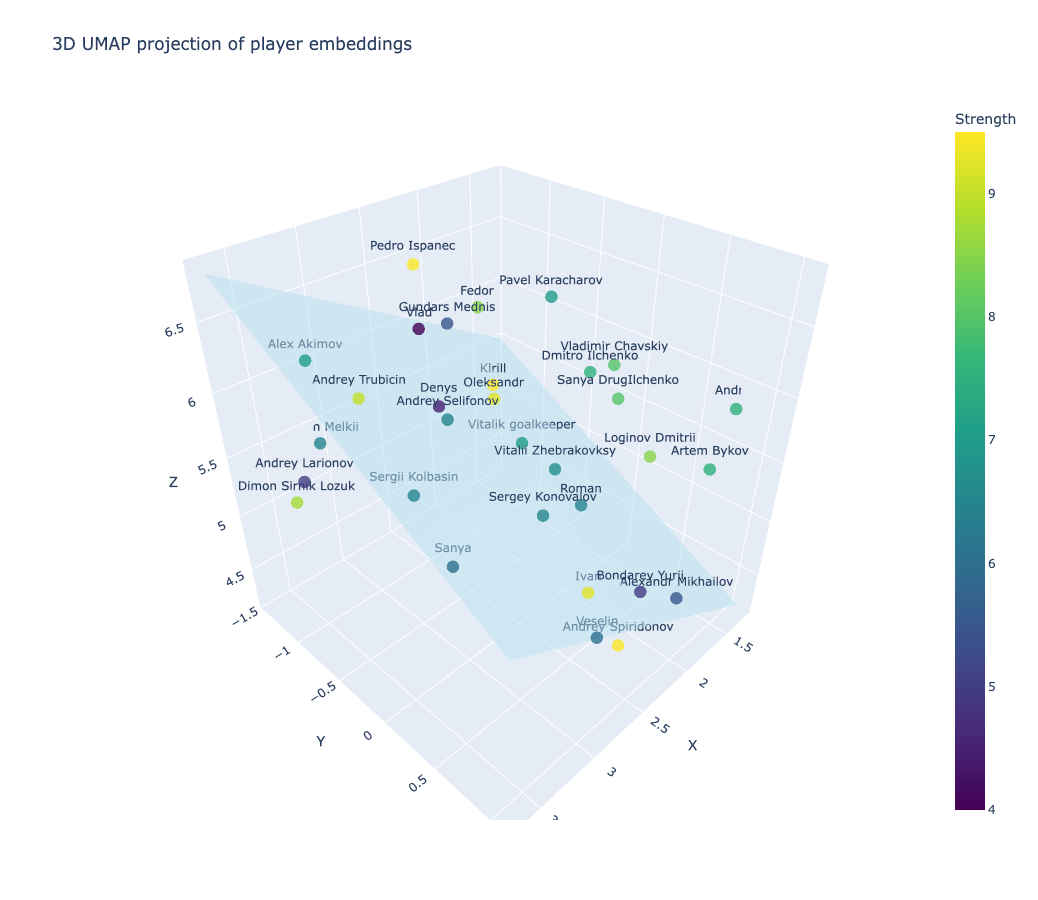

In [306]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Generate test embeddings and outcomes (replace these with actual data)
np.random.seed(42)
labels_points = [f'{name}' for name in team_members_with_ids.values()]


# Embed to 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embeddings_3d = reducer.fit_transform(player_embeddings_wzp)

x_emb = embeddings_3d[:, 0]
y_emb = embeddings_3d[:, 1]
z_emb = embeddings_3d[:, 2]

x_min = np.min(x_emb)
x_max = np.max(x_emb)
y_min = np.min(y_emb)
y_max = np.max(y_emb)
z_min = np.min(z_emb)
z_max = np.max(z_emb)

# Create interactive 3D scatter plot
scatter = go.Scatter3d(
        x=x_emb,
        y=y_emb,
        z=z_emb,
        # mode='markers',
        mode='markers+text',
        marker=dict(
            size=7,
            color=player_strengths_estimates_wzp,       # Color by this array
            colorscale='Viridis',         # Choose a colorscale
            colorbar=dict(title='Strength'),
            opacity=0.8
        ),
        text=labels_points,          # Hover labels
        hoverinfo='text'
    )
print(f"x_min: {x_min} x_max: {x_max}")
print(f"y_min: {y_min} y_max: {y_max}")
print(f"z_min: {z_min} z_max: {z_max}")


# Define the 3 corners of the triangle in 3D
x_m = [x_min, x_min, x_max, x_max,]  # Replace with your corner x coordinates
y_m = [y_min ,y_max, y_max, y_min]  # Replace with your corner y coordinates
z_m = [(z_max + z_min) / 2 , z_min, (z_max + z_min) / 2 , z_max]  # Replace with your corner z coordinates


# Define two triangles that form the rhombus
i = [0, 0]  # first vertices of triangles
j = [1, 2]  # second vertices of triangles
k = [2, 3]  # third vertices of triangles

# Create the Mesh3d object representing the triangle surface
triangle_surface = go.Mesh3d(
    x=x_m,
    y=y_m,
    z=z_m,
    i=i,
    j=j,
    k=k,
    color='lightblue',
    opacity=0.5,
    name='Rhombus'
)

# fig = go.Figure(data=[scatter, quivers])
fig = go.Figure(data=[triangle_surface, scatter])


fig.update_layout(
    title="3D UMAP projection of player embeddings",
    width=1000,             # <-- Change this to your desired width in pixels
    height=900,  
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()


In [307]:
import numpy as np
from scipy.stats import pearsonr

# Assuming these variables from your setup:
# player_strengths: numpy array of shape (num_players,)
# embeddings_3d: numpy array of shape (num_players, 3) -- UMAP 3D projections

num_players = player_strengths_estimates_wzp.shape[0] # NUM_PLAYERS ???
correlations = []
print(player_strengths_estimates_wzp.shape)
print(embeddings_3d.shape)
for dim in range(3):
    corr, p_value = pearsonr(embeddings_3d[:, dim], player_strengths_estimates_wzp)
    correlations.append((corr, p_value))
    print(f"Dimension {dim + 1} correlation with base strengths: r = {corr:.4f}, p-value = {p_value:.4g}")

# Optionally, compute average absolute correlation across all 3 dimensions
avg_abs_corr = np.mean([abs(c[0]) for c in correlations])
print(f"Average absolute correlation across 3 components: {avg_abs_corr:.4f}")


(31,)
(31, 3)
Dimension 1 correlation with base strengths: r = -0.2191, p-value = 0.2362
Dimension 2 correlation with base strengths: r = -0.0163, p-value = 0.9305
Dimension 3 correlation with base strengths: r = 0.0298, p-value = 0.8734
Average absolute correlation across 3 components: 0.0884


In [ ]:
# TODO
# 1. how vector embeddings initialisation affects results?
# 2. add scores statistics for the player to speedup learning

# 3. WHy embeddings always different?
# 4. How to check whether player zero embeddings change?
# 5. can SMOTE help with learning?